<a href="https://colab.research.google.com/github/armandossrecife/lp/blob/main/analise_alugueis_rj_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados de alugueis (Rio de Janeiro - 2020)

In [1]:
import pandas as pd

## Importando os dados

In [2]:
!wget https://raw.githubusercontent.com/armandossrecife/teste/main/aluguel.csv

--2023-01-17 12:52:15--  https://raw.githubusercontent.com/armandossrecife/teste/main/aluguel.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1634127 (1.6M) [text/plain]
Saving to: ‘aluguel.csv’

aluguel.csv         100%[===================>]   1.56M  --.-KB/s    in 0.06s   

2023-01-17 12:52:15 (27.1 MB/s) - ‘aluguel.csv’ saved [1634127/1634127]



In [3]:
!wget https://raw.githubusercontent.com/armandossrecife/teste/main/aluguel.xlsx

--2023-01-17 12:52:16--  https://raw.githubusercontent.com/armandossrecife/teste/main/aluguel.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10504 (10K) [application/octet-stream]
Saving to: ‘aluguel.xlsx’

aluguel.xlsx        100%[===================>]  10.26K  --.-KB/s    in 0s      

2023-01-17 12:52:16 (73.6 MB/s) - ‘aluguel.xlsx’ saved [10504/10504]



## Criando o dataframe a partir do arquivo de dados

CSV (Coma Separated Value)

https://en.wikipedia.org/wiki/Comma-separated_values

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [4]:
df_aluguel = pd.read_csv('aluguel.csv', sep=';')
df_aluguel

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


Lendo de arquivo Excel (.xls)

https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

In [5]:
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


### Tratamento das colunas com valores NaN (Nulos)

https://pandas.pydata.org/docs/reference/api/pandas.isnull.html
https://pandas.pydata.org/docs/reference/api/pandas.notna.html#pandas.notna

In [6]:
# Checa os valores "ausentes"
valor_null = df_aluguel['Valor'].isnull()
condominio_null = df_aluguel['Condominio'].isnull()
iptu_null = df_aluguel['IPTU'].isnull()

In [7]:
len(df_aluguel[valor_null])

17

In [44]:
df_aluguel.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

Desconsidera as colunas condominio e IPTU (Foco: valor de aluguel)

In [8]:
df_aluguel_valido = df_aluguel[['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor']]
df_aluguel_valido

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor
0,Quitinete,Copacabana,1,0,0,40,1700.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0
3,Apartamento,Centro,1,0,0,15,800.0
4,Apartamento,Higienópolis,1,0,0,48,800.0
...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0
32958,Apartamento,Leblon,2,0,0,70,3000.0


Remove os registros que não possuem valor de aluguel

In [9]:
valor_null = df_aluguel_valido['Valor'].isnull()

In [10]:
df_aluguel_valido[valor_null]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor
76,Apartamento,Barra da Tijuca,2,1,1,70,NaN
2186,Apartamento,Leme,2,0,0,75,NaN
2456,Casa,Campo Grande,3,4,3,363,NaN
2646,Loja/Salão,Barra da Tijuca,0,2,0,80,NaN
2941,Apartamento,Botafogo,2,0,0,95,NaN
2973,Apartamento,Copacabana,2,0,0,72,NaN
6598,Loja/Salão,Andaraí,0,0,0,326,NaN
7302,Casa,Campo Grande,3,2,1,100,NaN
12683,Apartamento,Leme,2,0,1,75,NaN
13229,Apartamento,Glória,3,0,1,135,NaN


Pega os índices dos registros que não tem valor

In [49]:
df_aluguel_valido[valor_null].index

Int64Index([   76,  2186,  2456,  2646,  2941,  2973,  6598,  7302, 12683,
            13229, 13525, 13579, 20948, 21822, 23056, 24805, 29166],
           dtype='int64')

Remove os registros com valor NaN

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

Obs: 

axis=0 para se referir as colunas 

axis=1 para se referir as linhas (registros)


In [12]:
df_aluguel_valido = df_aluguel_valido.drop(axis=1, index=df_aluguel_valido[valor_null].index)
df_aluguel_valido

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor
0,Quitinete,Copacabana,1,0,0,40,1700.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0
3,Apartamento,Centro,1,0,0,15,800.0
4,Apartamento,Higienópolis,1,0,0,48,800.0
...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0
32958,Apartamento,Leblon,2,0,0,70,3000.0


In [51]:
df_aluguel_valido.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32943 entries, 0 to 32959
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tipo     32943 non-null  object 
 1   Bairro   32943 non-null  object 
 2   Quartos  32943 non-null  int64  
 3   Vagas    32943 non-null  int64  
 4   Suites   32943 non-null  int64  
 5   Area     32943 non-null  int64  
 6   Valor    32943 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 2.0+ MB


## Informações básicas sobre o dataset de alugueis

### Quais são os tipos de imóveis disponíveis?

unique()

https://pandas.pydata.org/docs/reference/api/pandas.unique.html

In [13]:
df_aluguel_valido['Tipo'].unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [14]:
len(df_aluguel_valido['Tipo'].unique())

22

In [15]:
type(df_aluguel_valido['Tipo'].unique())

numpy.ndarray

In [16]:
lista_tipos_imoveis = df_aluguel_valido['Tipo'].unique().tolist()
lista_tipos_imoveis

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

### Quais são os bairros disponíveis?

In [17]:
df_aluguel_valido['Bairro'].unique()

array(['Copacabana', 'Jardim Botânico', 'Barra da Tijuca', 'Centro',
       'Higienópolis', 'Vista Alegre', 'Cachambi', 'Ramos', 'Grajaú',
       'Lins de Vasconcelos', 'Botafogo', 'Taquara',
       'Freguesia (Jacarepaguá)', 'Tijuca', 'Olaria', 'Leblon',
       'São Cristóvão', 'Ipanema', 'Campo Grande',
       'Recreio dos Bandeirantes', 'Jardim Oceânico', 'Humaitá',
       'Península', 'Méier', 'Vargem Pequena', 'Maracanã', 'Jacarepaguá',
       'Vargem Grande', 'São Conrado', 'Maria da Graça', 'Vila Valqueire',
       'Gávea', 'Cosme Velho', 'Bonsucesso', 'Todos os Santos',
       'Laranjeiras', 'Itanhangá', 'Flamengo', 'Praça Seca', 'Piedade',
       'Lagoa', 'Santo Cristo', 'Largo do Machado', 'Catete',
       'Jardim Carioca', 'Benfica', 'Glória', 'Vila Isabel',
       'Quintino Bocaiúva', 'São Francisco Xavier', 'Rocha Miranda',
       'Engenho Novo', 'Engenho de Dentro', 'Cidade Nova', 'Pilares',
       'Arpoador', 'Tomás Coelho', 'Água Santa', 'Ilha do Governador',
       'Ja

In [59]:
len(df_aluguel_valido['Bairro'].unique())

162

### Quais são os valores mínimo e máximo dos alugueis válidos?

In [18]:
df_aluguel_valido['Valor'].min()

75.0

In [19]:
df_aluguel_valido['Valor'].max()

120000000.0

Analisar os valores que sejam muito altos. (Talvez precise remover da base de alugueis)

In [20]:
df_aluguel_valido.query("Valor >= 1000000")

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor
4595,Galpão/Depósito/Armazém,Irajá,0,5,0,1100,15000000.0
5592,Prédio Inteiro,Jacarepaguá,0,15,0,1200,120000000.0
21024,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0
23491,Apartamento,Botafogo,4,1,1,300,4500000.0
25632,Prédio Inteiro,Humaitá,0,96,0,8279,1324640.0
26327,Conjunto Comercial/Sala,Caju,0,0,0,10660,1279200.0
28047,Prédio Inteiro,Humaitá,0,96,0,8279,1076270.0


### Informações de Apartamentos

In [21]:
df_aluguel_apartamentos = df_aluguel_valido.query("Tipo == 'Apartamento'")
df_aluguel_apartamentos

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor
3,Apartamento,Centro,1,0,0,15,800.0
4,Apartamento,Higienópolis,1,0,0,48,800.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0
6,Apartamento,Cachambi,2,0,0,50,1300.0
10,Apartamento,Centro,1,0,0,36,1200.0
...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0
32953,Apartamento,Méier,2,0,0,70,900.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0


Qual o valor médio, min e max dos apartamentos?

In [22]:
df_aluguel_apartamentos.Valor.mean()

4744.614647887324

In [23]:
round(df_aluguel_apartamentos.Valor.mean(), 2)

4744.61

In [24]:
df_aluguel_apartamentos.Valor.min()

100.0

In [25]:
apartamento_aluguel_min = df_aluguel_apartamentos.Valor.min()
consulta_min = f"Valor == {apartamento_aluguel_min}"
df_aluguel_apartamentos.query(consulta_min)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor
8418,Apartamento,Copacabana,0,0,0,15,100.0
13166,Apartamento,Barra da Tijuca,0,0,0,15,100.0
21745,Apartamento,Leblon,0,0,0,15,100.0


In [26]:
df_aluguel_apartamentos.Valor.max()

4500000.0

In [27]:
apartamento_aluguel_max = df_aluguel_apartamentos.Valor.max()
consulta_max = f"Valor == {apartamento_aluguel_max}"
df_aluguel_apartamentos.query(consulta_max)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor
23491,Apartamento,Botafogo,4,1,1,300,4500000.0


Apartamentos por Bairro

value_counts() 

https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

In [30]:
df_aluguel_apartamentos['Bairro'].value_counts()

Barra da Tijuca             3340
Copacabana                  2464
Ipanema                     1768
Recreio dos Bandeirantes    1490
Leblon                      1241
                            ... 
Caju                           1
Parque Anchieta                1
Cidade Jardim                  1
Coelho Neto                    1
Grumari                        1
Name: Bairro, Length: 149, dtype: int64

In [31]:
s_apartamentos_por_bairro = df_aluguel_apartamentos['Bairro'].value_counts()
s_apartamentos_por_bairro

Barra da Tijuca             3340
Copacabana                  2464
Ipanema                     1768
Recreio dos Bandeirantes    1490
Leblon                      1241
                            ... 
Caju                           1
Parque Anchieta                1
Cidade Jardim                  1
Coelho Neto                    1
Grumari                        1
Name: Bairro, Length: 149, dtype: int64

In [41]:
s_apartamentos_por_bairro.index

Index(['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Recreio dos Bandeirantes',
       'Leblon', 'Tijuca', 'Botafogo', 'Flamengo', 'Lagoa',
       'Freguesia (Jacarepaguá)',
       ...
       'Pitangueiras', 'Inhoaíba', 'Fátima', 'Saúde', 'Joá', 'Caju',
       'Parque Anchieta', 'Cidade Jardim', 'Coelho Neto', 'Grumari'],
      dtype='object', length=149)

In [46]:
# Quantidade de apartamentos no Bairro de Copacabana
s_apartamentos_por_bairro['Copacabana']

2464

In [ ]:
for i in range(149):
  bairro = s_apartamentos_por_bairro.index[i]
  qtd_apartamentos = s_apartamentos_por_bairro[bairro]
  print(f"Bairro: {bairro}: {qtd_apartamentos}")

O valor médio dos apartamentos **agrupados** por bairro

**groupby**: retorna um objeto GroupBy, agrupado por valores na coluna denominada "col".

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [81]:
df_aluguel_apartamentos[['Bairro', 'Valor']].sort_values(['Bairro'])

,Bairro,Valor
21523,Abolição,800.0
32328,Abolição,1200.0
14971,Abolição,1200.0
28488,Abolição,900.0
10684,Abolição,1300.0
...,...,...
20939,Água Santa,950.0
25211,Água Santa,700.0
21531,Água Santa,800.0
20522,Água Santa,850.0


In [50]:
df_aluguel_apartamentos[['Bairro', 'Valor']].groupby(['Bairro'])

In [90]:
df_aluguel_apartamentos[['Bairro', 'Valor']].groupby(['Bairro']).mean()

,Valor
Bairro,
Abolição,1015.000000
Alto da Boa Vista,1483.333333
Anchieta,710.000000
Andaraí,1418.989130
Anil,1481.428571
...,...
Vila Valqueire,1476.666667
Vila da Penha,1155.326087
Vista Alegre,1090.555556


In [51]:
df_valor_medio_aluguel_por_bairro = df_aluguel_apartamentos[['Bairro', 'Valor']].groupby(['Bairro']).mean()
df_valor_medio_aluguel_por_bairro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, Abolição to Água Santa
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Valor   149 non-null    float64
dtypes: float64(1)
memory usage: 2.3+ KB


In [52]:
df_aluguel_apartamentos[['Bairro', 'Valor']].groupby(['Bairro']).mean().applymap('{:.2f}'.format)

,Valor
Bairro,
Abolição,1015.00
Alto da Boa Vista,1483.33
Anchieta,710.00
Andaraí,1418.99
Anil,1481.43
...,...
Vila Valqueire,1476.67
Vila da Penha,1155.33
Vista Alegre,1090.56


In [53]:
df_valor_medio_aluguel_por_bairro.index

Index(['Abolição', 'Alto da Boa Vista', 'Anchieta', 'Andaraí', 'Anil',
       'Arpoador', 'Bancários', 'Bangu', 'Barra da Tijuca',
       'Barra de Guaratiba',
       ...
       'Vicente de Carvalho', 'Vidigal', 'Vigário Geral', 'Vila Isabel',
       'Vila Kosmos', 'Vila Valqueire', 'Vila da Penha', 'Vista Alegre',
       'Zumbi', 'Água Santa'],
      dtype='object', name='Bairro', length=149)

In [67]:
df_valor_medio_aluguel_por_bairro.loc['Leblon']

Valor    8637.761483
Name: Leblon, dtype: float64

In [55]:
df_valor_medio_aluguel_por_bairro.loc['Copacabana']

Valor    4447.457386
Name: Copacabana, dtype: float64

In [56]:
df_valor_medio_aluguel_por_bairro.loc['Barra da Tijuca']

Valor    5586.852994
Name: Barra da Tijuca, dtype: float64

In [68]:
df_aluguel_apartamentos.head(3)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor
3,Apartamento,Centro,1,0,0,15,800.0
4,Apartamento,Higienópolis,1,0,0,48,800.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0


Quais os apartamentos do Bairro Barra da Tijuca, com 3 quartos que custam até R$ 3.000,00 de aluguel?

In [71]:
bairro='Barra da Tijuca'
quartos=3
valor=3000

In [73]:
consulta_apartamento = f"Bairro == '{bairro}' and Quartos=={quartos} and Valor<={valor}"
df_aluguel_apartamentos.query(consulta_apartamento)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor
41,Apartamento,Barra da Tijuca,3,1,2,70,1800.0
49,Apartamento,Barra da Tijuca,3,1,1,72,2350.0
90,Apartamento,Barra da Tijuca,3,2,1,104,2600.0
97,Apartamento,Barra da Tijuca,3,2,2,85,2500.0
158,Apartamento,Barra da Tijuca,3,2,1,128,3000.0
...,...,...,...,...,...,...,...
31839,Apartamento,Barra da Tijuca,3,1,1,87,1600.0
32365,Apartamento,Barra da Tijuca,3,2,1,120,2900.0
32534,Apartamento,Barra da Tijuca,3,1,1,62,1600.0
32692,Apartamento,Barra da Tijuca,3,2,1,85,2500.0


Qual a distribuição de frequência dos valores de aluguel dos apartamentos da Barra da Tijuca variando até R$ 3.000,00?

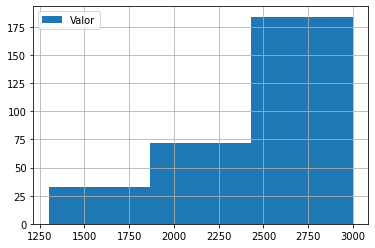

In [76]:
df_aluguel_apartamentos.query(consulta_apartamento)['Valor'].hist(bins=3)

In [78]:
df_aluguel_apartamentos.query(consulta_apartamento).query("Valor >= 2500")

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor
90,Apartamento,Barra da Tijuca,3,2,1,104,2600.0
97,Apartamento,Barra da Tijuca,3,2,2,85,2500.0
158,Apartamento,Barra da Tijuca,3,2,1,128,3000.0
197,Apartamento,Barra da Tijuca,3,1,2,93,2500.0
325,Apartamento,Barra da Tijuca,3,1,1,105,2500.0
...,...,...,...,...,...,...,...
31413,Apartamento,Barra da Tijuca,3,2,1,110,2800.0
31489,Apartamento,Barra da Tijuca,3,2,1,141,3000.0
31713,Apartamento,Barra da Tijuca,3,2,1,100,3000.0
32365,Apartamento,Barra da Tijuca,3,2,1,120,2900.0


Faça uma comparação (apartamentos na Barra da Tijuca) dos preços desta base de dados com o site 5o. Andar (https://www.quintoandar.com.br/)